# Dependancies

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from keras import *

import numpy as np
import pandas as pd

Using TensorFlow backend.


# Data

In [0]:
path_to_data = "/content/Full Database for TCRs.csv"

In [0]:
data = pd.read_csv(path_to_data)
data = data.dropna()
data = data.reset_index(drop=True)

data_epitope = data['Epitope'][:50001]
data_v = data['V'][:50001]
data_j = data['J'][:50001]
data_cdr3 = data['CDR3'][:50001]

In [0]:
def encoder_protien(data_frame):
  encoder_dict = {'a':2,'b':3,'c':4,'d':5,'e':6,'f':7,'g':8,'h':9,'i':10,
             'j':11,'k':12,'l':13,'m':14,'n':15,'o':16,'p':17,'q':18,'r':19,'s':20,
             't':21,'u':22,'v':23,'w':24,'x':25,'y':26,'z':27,'=':28}

  output = []
  max_length = 0

  for sequence in data_frame:
    a = len(sequence)
    if (a > max_length):
      max_length = a+2

  for sequence in data_frame:
    sequence_temp = []

    for protien in sequence:
      sequence_temp.append(encoder_dict[protien.lower()])

    for i in range(max_length-len(sequence_temp)):
      sequence_temp.append(0)

    output.append(sequence_temp)

  output = np.asarray(output)
  return output

In [0]:
from keras.utils import to_categorical
unique_v = list(data_v.unique())

Y_Train = []

for i in data_v:
  temp = []
  Y_Train.append(unique_v.index(i))

Y_Train = to_categorical(Y_Train)

Y_Train = np.asarray(Y_Train)
X_Train = encoder_protien(data_epitope)

In [7]:
Input_Layer = tf.keras.layers.Input(shape=(22))

Embedding_Layer = tf.keras.layers.Embedding(22,128)(Input_Layer)
LSTM1 = tf.keras.layers.LSTM(128)(Embedding_Layer)

Dense0 = tf.keras.layers.Dense(5000,activation='relu')(LSTM1)
Dense1 = tf.keras.layers.Dense(5000,activation='relu')(Dense0)
Dense2 = tf.keras.layers.Dense(5000,activation='relu')(Dense1)
Dense3 = tf.keras.layers.Dense(2500,activation='relu')(Dense2)
Dense4 = tf.keras.layers.Dense(500,activation='relu')(Dense3) 

Dense5 = tf.keras.layers.Dense(126,activation='softmax')(Dense4)
model = tf.keras.Model(inputs=Input_Layer,outputs=Dense5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
saved = tf.keras.callbacks.ModelCheckpoint("/content/TCR_Normal_Model.hdf5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

In [10]:
history = model.fit(X_Train,Y_Train,epochs=30,validation_split=0.2,shuffle=True,callbacks=[saved])

Train on 40000 samples, validate on 10001 samples
Epoch 1/30
40000/40000 [==============================] - 65s 2ms/sample - loss: 3.3440 - acc: 0.1506 - val_loss: 9.9843 - val_acc: 0.0458
Epoch 2/30
40000/40000 [==============================] - 62s 2ms/sample - loss: 3.3262 - acc: 0.1500 - val_loss: 10.1450 - val_acc: 0.0163
Epoch 3/30
40000/40000 [==============================] - 62s 2ms/sample - loss: 3.3153 - acc: 0.1542 - val_loss: 10.4081 - val_acc: 0.0162
Epoch 4/30
40000/40000 [==============================] - 63s 2ms/sample - loss: 3.2798 - acc: 0.1620 - val_loss: 11.9749 - val_acc: 0.0432
Epoch 5/30
40000/40000 [==============================] - 62s 2ms/sample - loss: 3.2825 - acc: 0.1633 - val_loss: 12.7016 - val_acc: 0.0131
Epoch 6/30
40000/40000 [==============================] - 62s 2ms/sample - loss: 3.2706 - acc: 0.1619 - val_loss: 12.4624 - val_acc: 0.0174
Epoch 7/30
40000/40000 [==============================] - 62s 2ms/sample - loss: 3.2701 - acc: 0.1637 - val_los

In [0]:
model.save('/content/TCR_Model_Normal.hdf5')

In [0]:
rand = np.random.randint(0,50001)
a = model.predict(X_Train[rand].reshape(1,22))
a = np.argmax(a)
b = np.argmax(Y_Train[rand])

print(a)
print(b)

# Visualization

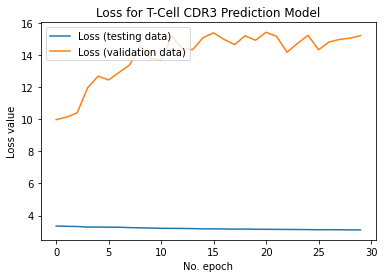

In [11]:
plt.plot(history.history['loss'], label='Loss (testing data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for T-Cell CDR3 Prediction Model')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

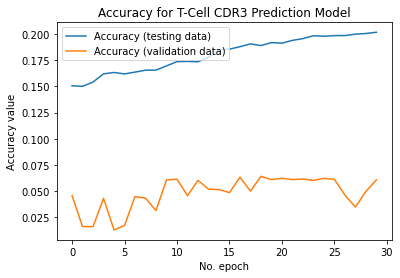

In [12]:
plt.plot(history.history['acc'], label='Accuracy (testing data)')
plt.plot(history.history['val_acc'], label='Accuracy (validation data)')
plt.title('Accuracy for T-Cell CDR3 Prediction Model')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()